In [61]:
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as CM
from tqdm import tqdm
from config import Config

from model import CSRNet
from dataset import *

In [62]:
def cal_mae(img_root,gt_dmap_root,model_param_path):
    '''
    Calculate the MAE of the test data.
    img_root: the root of test image data.
    gt_dmap_root: the root of test ground truth density-map data.
    model_param_path: the path of specific mcnn parameters.
    '''
    cfg= Config()
    #device= cfg.device
    device = torch.device("cpu")
    model=CSRNet()
    #model.load_state_dict(torch.load(model_param_path))
    torch.load(model_param_path, map_location=lambda storage, loc: storage)
    model.to(device)
    """
    @Mushy 
    Changed data loader to give path From config device 
    
    """

    dataloader = create_test_dataloader(cfg.dataset_root)
    #dataloader=torch.utils.data.DataLoader(dataset,batch_size=1,shuffle=False)
    model.eval()
    mae=0
    with torch.no_grad():
        for i,data in enumerate(tqdm(dataloader)):
            """
            @Mushy 
            Changed how to access the data . 
            """

            img= data['image'].to(device)
            #gt_dmap=gt_dmap.to(device)
            gt_dmap = data['densitymap'].to(device)
            # forward propagation
            et_dmap=model(img)
            mae+=abs(et_dmap.data.sum()-gt_dmap.data.sum()).item()
            del img,gt_dmap,et_dmap

    print("model_param_path:"+model_param_path+" mae:"+str(mae/len(dataloader)))

In [63]:
def estimate_density_map(img_root,gt_dmap_root,model_param_path,index):
    '''

    @Mushy Hi Jess I made similar changes jere
    You the best.
    Show one estimated density-map.
    img_root: the root of test image data.
    gt_dmap_root: the root of test ground truth density-map data.
    model_param_path: the path of specific mcnn parameters.
    index: the order of the test image in test dataset.
    '''
    device=torch.device("cpu")
    model=CSRNet().to(device)
    #model.load_state_dict(torch.load(model_param_path))
    torch.load(model_param_path, map_location=lambda storage, loc: storage)
    cfg = Config()
    dataloader = create_test_dataloader(cfg.dataset_root)
    model.eval()
    for i,data in enumerate(dataloader):
        if i==index:
            img = data['image'].to(device)
            # gt_dmap=gt_dmap.to(device)
            gt_dmap = data['densitymap'].to(device)
            # forward propagation
            et_dmap=model(img).detach()
            et_dmap=et_dmap.squeeze(0).squeeze(0).cpu().numpy()
            print(et_dmap.shape)
            plt.imshow(et_dmap,cmap=CM.gray)
            plt.show()
            break

  0%|          | 0/182 [00:00<?, ?it/s]

Before backend torch.Size([1, 512, 96, 128])


  1%|          | 1/182 [00:06<19:24,  6.43s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])


  1%|          | 2/182 [00:11<18:25,  6.14s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 74, 112])


  2%|▏         | 3/182 [00:16<16:53,  5.66s/it]

After backend torch.Size([1, 64, 74, 112])
After output layer:  torch.Size([1, 1, 74, 112])
Final out torch.Size([1, 1, 592, 896])
Before backend torch.Size([1, 512, 82, 128])


  2%|▏         | 4/182 [00:24<18:32,  6.25s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 88, 128])


  3%|▎         | 5/182 [00:30<18:50,  6.39s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])


  3%|▎         | 6/182 [00:31<13:59,  4.77s/it]

Before backend torch.Size([1, 512, 34, 56])
After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])
Final out torch.Size([1, 1, 272, 448])
Before backend torch.Size([1, 512, 48, 74])


  4%|▍         | 7/182 [00:33<11:20,  3.89s/it]

After backend torch.Size([1, 64, 48, 74])
After output layer:  torch.Size([1, 1, 48, 74])
Final out torch.Size([1, 1, 384, 592])
Before backend torch.Size([1, 512, 84, 128])


  4%|▍         | 8/182 [00:39<12:43,  4.39s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


  5%|▍         | 9/182 [00:44<13:45,  4.77s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 128])


  5%|▌         | 10/182 [00:49<13:35,  4.74s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 52, 78])


  6%|▌         | 11/182 [00:51<11:10,  3.92s/it]

After backend torch.Size([1, 64, 52, 78])
After output layer:  torch.Size([1, 1, 52, 78])
Final out torch.Size([1, 1, 416, 624])
Before backend torch.Size([1, 512, 50, 112])


  7%|▋         | 12/182 [00:54<10:11,  3.60s/it]

After backend torch.Size([1, 64, 50, 112])
After output layer:  torch.Size([1, 1, 50, 112])
Final out torch.Size([1, 1, 400, 896])
Before backend torch.Size([1, 512, 96, 128])


  7%|▋         | 13/182 [01:01<12:53,  4.58s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])


  8%|▊         | 14/182 [01:06<13:48,  4.93s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 52, 80])


  8%|▊         | 15/182 [01:09<11:30,  4.13s/it]

After backend torch.Size([1, 64, 52, 80])
After output layer:  torch.Size([1, 1, 52, 80])
Final out torch.Size([1, 1, 416, 640])
Before backend torch.Size([1, 512, 76, 50])


  9%|▉         | 16/182 [01:11<09:39,  3.49s/it]

After backend torch.Size([1, 64, 76, 50])
After output layer:  torch.Size([1, 1, 76, 50])
Final out torch.Size([1, 1, 608, 400])
Before backend torch.Size([1, 512, 96, 120])


  9%|▉         | 17/182 [01:17<11:56,  4.34s/it]

After backend torch.Size([1, 64, 96, 120])
After output layer:  torch.Size([1, 1, 96, 120])
Final out torch.Size([1, 1, 768, 960])
Before backend torch.Size([1, 512, 96, 128])


 10%|▉         | 18/182 [01:24<13:47,  5.05s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])


 10%|█         | 19/182 [01:30<14:48,  5.45s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 52, 66])


 11%|█         | 20/182 [01:32<11:40,  4.32s/it]

After backend torch.Size([1, 64, 52, 66])
After output layer:  torch.Size([1, 1, 52, 66])
Final out torch.Size([1, 1, 416, 528])
Before backend torch.Size([1, 512, 82, 128])


 12%|█▏        | 21/182 [01:37<12:15,  4.57s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 84, 128])


 12%|█▏        | 22/182 [01:42<12:42,  4.76s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 62, 128])


 13%|█▎        | 23/182 [01:46<12:06,  4.57s/it]

After backend torch.Size([1, 64, 62, 128])
After output layer:  torch.Size([1, 1, 62, 128])
Final out torch.Size([1, 1, 496, 1024])
Before backend torch.Size([1, 512, 84, 128])


 13%|█▎        | 24/182 [01:52<12:48,  4.86s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 14%|█▎        | 25/182 [01:57<13:00,  4.97s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])


 14%|█▍        | 26/182 [01:58<09:46,  3.76s/it]

Before backend torch.Size([1, 512, 54, 36])
After backend torch.Size([1, 64, 54, 36])
After output layer:  torch.Size([1, 1, 54, 36])
Final out torch.Size([1, 1, 432, 288])
Before backend torch.Size([1, 512, 84, 128])


 15%|█▍        | 27/182 [02:03<10:49,  4.19s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 15%|█▌        | 28/182 [02:08<11:32,  4.50s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 62, 124])


 16%|█▌        | 29/182 [02:12<10:58,  4.30s/it]

After backend torch.Size([1, 64, 62, 124])
After output layer:  torch.Size([1, 1, 62, 124])
Final out torch.Size([1, 1, 496, 992])
Before backend torch.Size([1, 512, 84, 128])


 16%|█▋        | 30/182 [02:17<11:36,  4.58s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])


 17%|█▋        | 31/182 [02:19<08:57,  3.56s/it]

Before backend torch.Size([1, 512, 40, 62])
After backend torch.Size([1, 64, 40, 62])
After output layer:  torch.Size([1, 1, 40, 62])
Final out torch.Size([1, 1, 320, 496])
Before backend torch.Size([1, 512, 90, 120])


 18%|█▊        | 32/182 [02:24<10:18,  4.12s/it]

After backend torch.Size([1, 64, 90, 120])
After output layer:  torch.Size([1, 1, 90, 120])
Final out torch.Size([1, 1, 720, 960])
Before backend torch.Size([1, 512, 58, 124])


 18%|█▊        | 33/182 [02:28<09:43,  3.91s/it]

After backend torch.Size([1, 64, 58, 124])
After output layer:  torch.Size([1, 1, 58, 124])
Final out torch.Size([1, 1, 464, 992])


 19%|█▊        | 34/182 [02:29<07:36,  3.08s/it]

Before backend torch.Size([1, 512, 40, 62])
After backend torch.Size([1, 64, 40, 62])
After output layer:  torch.Size([1, 1, 40, 62])
Final out torch.Size([1, 1, 320, 496])
Before backend torch.Size([1, 512, 96, 128])


 19%|█▉        | 35/182 [02:35<09:42,  3.96s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 56, 86])


 20%|█▉        | 36/182 [02:37<08:27,  3.47s/it]

After backend torch.Size([1, 64, 56, 86])
After output layer:  torch.Size([1, 1, 56, 86])
Final out torch.Size([1, 1, 448, 688])
There is a grayscale image.
Before backend torch.Size([1, 512, 62, 128])


 20%|██        | 37/182 [02:41<08:58,  3.71s/it]

After backend torch.Size([1, 64, 62, 128])
After output layer:  torch.Size([1, 1, 62, 128])
Final out torch.Size([1, 1, 496, 1024])
Before backend torch.Size([1, 512, 84, 128])


 21%|██        | 38/182 [02:47<10:14,  4.27s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 86, 128])


 21%|██▏       | 39/182 [02:54<11:52,  4.98s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 46, 70])


 22%|██▏       | 40/182 [02:55<09:33,  4.04s/it]

After backend torch.Size([1, 64, 46, 70])
After output layer:  torch.Size([1, 1, 46, 70])
Final out torch.Size([1, 1, 368, 560])
Before backend torch.Size([1, 512, 84, 128])


 23%|██▎       | 41/182 [03:01<10:40,  4.54s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 74, 100])


 23%|██▎       | 42/182 [03:05<10:00,  4.29s/it]

After backend torch.Size([1, 64, 74, 100])
After output layer:  torch.Size([1, 1, 74, 100])
Final out torch.Size([1, 1, 592, 800])
Before backend torch.Size([1, 512, 54, 80])


 24%|██▎       | 43/182 [03:07<08:22,  3.61s/it]

After backend torch.Size([1, 64, 54, 80])
After output layer:  torch.Size([1, 1, 54, 80])
Final out torch.Size([1, 1, 432, 640])
Before backend torch.Size([1, 512, 96, 128])


 24%|██▍       | 44/182 [03:13<09:58,  4.34s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])


 25%|██▍       | 45/182 [03:14<07:46,  3.40s/it]

Before backend torch.Size([1, 512, 44, 58])
After backend torch.Size([1, 64, 44, 58])
After output layer:  torch.Size([1, 1, 44, 58])
Final out torch.Size([1, 1, 352, 464])
Before backend torch.Size([1, 512, 66, 120])


 25%|██▌       | 46/182 [03:18<08:06,  3.57s/it]

After backend torch.Size([1, 64, 66, 120])
After output layer:  torch.Size([1, 1, 66, 120])
Final out torch.Size([1, 1, 528, 960])
Before backend torch.Size([1, 512, 58, 128])


 26%|██▌       | 47/182 [03:22<08:12,  3.65s/it]

After backend torch.Size([1, 64, 58, 128])
After output layer:  torch.Size([1, 1, 58, 128])
Final out torch.Size([1, 1, 464, 1024])
Before backend torch.Size([1, 512, 92, 128])


 26%|██▋       | 48/182 [03:28<09:45,  4.37s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 128, 92])


 27%|██▋       | 49/182 [03:34<10:44,  4.84s/it]

After backend torch.Size([1, 64, 128, 92])
After output layer:  torch.Size([1, 1, 128, 92])
Final out torch.Size([1, 1, 1024, 736])
Before backend torch.Size([1, 512, 60, 80])


 27%|██▋       | 50/182 [03:36<08:57,  4.07s/it]

After backend torch.Size([1, 64, 60, 80])
After output layer:  torch.Size([1, 1, 60, 80])
Final out torch.Size([1, 1, 480, 640])
Before backend torch.Size([1, 512, 60, 80])


 28%|██▊       | 51/182 [03:38<07:40,  3.51s/it]

After backend torch.Size([1, 64, 60, 80])
After output layer:  torch.Size([1, 1, 60, 80])
Final out torch.Size([1, 1, 480, 640])
Before backend torch.Size([1, 512, 54, 128])


 29%|██▊       | 52/182 [03:42<07:35,  3.50s/it]

After backend torch.Size([1, 64, 54, 128])
After output layer:  torch.Size([1, 1, 54, 128])
Final out torch.Size([1, 1, 432, 1024])
Before backend torch.Size([1, 512, 52, 74])


 29%|██▉       | 53/182 [03:44<06:27,  3.00s/it]

After backend torch.Size([1, 64, 52, 74])
After output layer:  torch.Size([1, 1, 52, 74])
Final out torch.Size([1, 1, 416, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 88, 128])


 30%|██▉       | 54/182 [03:51<08:58,  4.21s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])
Before backend torch.Size([1, 512, 62, 80])


 30%|███       | 55/182 [03:53<07:54,  3.74s/it]

After backend torch.Size([1, 64, 62, 80])
After output layer:  torch.Size([1, 1, 62, 80])
Final out torch.Size([1, 1, 496, 640])
Before backend torch.Size([1, 512, 84, 128])


 31%|███       | 56/182 [03:59<09:07,  4.35s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 50, 70])


 31%|███▏      | 57/182 [04:01<07:24,  3.56s/it]

After backend torch.Size([1, 64, 50, 70])
After output layer:  torch.Size([1, 1, 50, 70])
Final out torch.Size([1, 1, 400, 560])
Before backend torch.Size([1, 512, 56, 76])


 32%|███▏      | 58/182 [04:03<06:30,  3.15s/it]

After backend torch.Size([1, 64, 56, 76])
After output layer:  torch.Size([1, 1, 56, 76])
Final out torch.Size([1, 1, 448, 608])
Before backend torch.Size([1, 512, 42, 106])


 32%|███▏      | 59/182 [04:05<05:58,  2.91s/it]

After backend torch.Size([1, 64, 42, 106])
After output layer:  torch.Size([1, 1, 42, 106])
Final out torch.Size([1, 1, 336, 848])
There is a grayscale image.
Before backend torch.Size([1, 512, 94, 128])


 33%|███▎      | 60/182 [04:12<08:13,  4.04s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])
Before backend torch.Size([1, 512, 50, 84])


 34%|███▎      | 61/182 [04:14<06:56,  3.44s/it]

After backend torch.Size([1, 64, 50, 84])
After output layer:  torch.Size([1, 1, 50, 84])
Final out torch.Size([1, 1, 400, 672])
Before backend torch.Size([1, 512, 58, 78])


 34%|███▍      | 62/182 [04:16<06:10,  3.09s/it]

After backend torch.Size([1, 64, 58, 78])
After output layer:  torch.Size([1, 1, 58, 78])
Final out torch.Size([1, 1, 464, 624])
There is a grayscale image.
Before backend torch.Size([1, 512, 48, 74])


 35%|███▍      | 63/182 [04:19<05:38,  2.84s/it]

After backend torch.Size([1, 64, 48, 74])
After output layer:  torch.Size([1, 1, 48, 74])
Final out torch.Size([1, 1, 384, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 62, 80])


 35%|███▌      | 64/182 [04:21<05:22,  2.73s/it]

After backend torch.Size([1, 64, 62, 80])
After output layer:  torch.Size([1, 1, 62, 80])
Final out torch.Size([1, 1, 496, 640])
Before backend torch.Size([1, 512, 66, 120])


 36%|███▌      | 65/182 [04:25<06:12,  3.18s/it]

After backend torch.Size([1, 64, 66, 120])
After output layer:  torch.Size([1, 1, 66, 120])
Final out torch.Size([1, 1, 528, 960])
Before backend torch.Size([1, 512, 42, 128])


 36%|███▋      | 66/182 [04:28<06:02,  3.13s/it]

After backend torch.Size([1, 64, 42, 128])
After output layer:  torch.Size([1, 1, 42, 128])
Final out torch.Size([1, 1, 336, 1024])
Before backend torch.Size([1, 512, 88, 128])


 37%|███▋      | 67/182 [04:34<07:31,  3.93s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])


 37%|███▋      | 68/182 [04:35<05:56,  3.13s/it]

Before backend torch.Size([1, 512, 44, 58])
After backend torch.Size([1, 64, 44, 58])
After output layer:  torch.Size([1, 1, 44, 58])
Final out torch.Size([1, 1, 352, 464])
Before backend torch.Size([1, 512, 92, 128])


 38%|███▊      | 69/182 [04:41<07:32,  4.00s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 74, 112])


 38%|███▊      | 70/182 [04:46<07:52,  4.22s/it]

After backend torch.Size([1, 64, 74, 112])
After output layer:  torch.Size([1, 1, 74, 112])
Final out torch.Size([1, 1, 592, 896])
Before backend torch.Size([1, 512, 66, 128])


 39%|███▉      | 71/182 [04:51<07:54,  4.28s/it]

After backend torch.Size([1, 64, 66, 128])
After output layer:  torch.Size([1, 1, 66, 128])
Final out torch.Size([1, 1, 528, 1024])
Before backend torch.Size([1, 512, 66, 100])


 40%|███▉      | 72/182 [04:54<07:18,  3.98s/it]

After backend torch.Size([1, 64, 66, 100])
After output layer:  torch.Size([1, 1, 66, 100])
Final out torch.Size([1, 1, 528, 800])
Before backend torch.Size([1, 512, 56, 84])


 40%|████      | 73/182 [04:56<06:15,  3.44s/it]

After backend torch.Size([1, 64, 56, 84])
After output layer:  torch.Size([1, 1, 56, 84])
Final out torch.Size([1, 1, 448, 672])
Before backend torch.Size([1, 512, 60, 78])


 41%|████      | 74/182 [04:58<05:34,  3.09s/it]

After backend torch.Size([1, 64, 60, 78])
After output layer:  torch.Size([1, 1, 60, 78])
Final out torch.Size([1, 1, 480, 624])
Before backend torch.Size([1, 512, 84, 128])


 41%|████      | 75/182 [05:04<06:47,  3.81s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 42%|████▏     | 76/182 [05:09<07:29,  4.24s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 110])


 42%|████▏     | 77/182 [05:13<07:16,  4.16s/it]

After backend torch.Size([1, 64, 72, 110])
After output layer:  torch.Size([1, 1, 72, 110])
Final out torch.Size([1, 1, 576, 880])
Before backend torch.Size([1, 512, 52, 74])


 43%|████▎     | 78/182 [05:15<06:02,  3.48s/it]

After backend torch.Size([1, 64, 52, 74])
After output layer:  torch.Size([1, 1, 52, 74])
Final out torch.Size([1, 1, 416, 592])


 43%|████▎     | 79/182 [05:16<04:50,  2.82s/it]

Before backend torch.Size([1, 512, 32, 86])
After backend torch.Size([1, 64, 32, 86])
After output layer:  torch.Size([1, 1, 32, 86])
Final out torch.Size([1, 1, 256, 688])
Before backend torch.Size([1, 512, 84, 128])


 44%|████▍     | 80/182 [05:21<06:02,  3.55s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 80, 128])


 45%|████▍     | 81/182 [05:27<06:52,  4.09s/it]

After backend torch.Size([1, 64, 80, 128])
After output layer:  torch.Size([1, 1, 80, 128])
Final out torch.Size([1, 1, 640, 1024])
Before backend torch.Size([1, 512, 96, 128])


 45%|████▌     | 82/182 [05:33<08:03,  4.83s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])


 46%|████▌     | 83/182 [05:39<08:34,  5.19s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])


 46%|████▌     | 84/182 [05:45<08:30,  5.21s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 128])


 47%|████▋     | 85/182 [05:50<08:42,  5.38s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])


 47%|████▋     | 86/182 [05:52<06:37,  4.14s/it]

Before backend torch.Size([1, 512, 34, 68])
After backend torch.Size([1, 64, 34, 68])
After output layer:  torch.Size([1, 1, 34, 68])
Final out torch.Size([1, 1, 272, 544])
Before backend torch.Size([1, 512, 84, 128])


 48%|████▊     | 87/182 [05:57<07:16,  4.59s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 48%|████▊     | 88/182 [06:03<07:56,  5.07s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 128, 84])


 49%|████▉     | 89/182 [06:10<08:28,  5.47s/it]

After backend torch.Size([1, 64, 128, 84])
After output layer:  torch.Size([1, 1, 128, 84])
Final out torch.Size([1, 1, 1024, 672])
Before backend torch.Size([1, 512, 72, 128])


 49%|████▉     | 90/182 [06:14<07:59,  5.21s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 86, 128])


 50%|█████     | 91/182 [06:20<08:16,  5.45s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 96, 128])


 51%|█████     | 92/182 [06:27<08:28,  5.65s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 40, 128])


 51%|█████     | 93/182 [06:29<06:58,  4.70s/it]

After backend torch.Size([1, 64, 40, 128])
After output layer:  torch.Size([1, 1, 40, 128])
Final out torch.Size([1, 1, 320, 1024])
Before backend torch.Size([1, 512, 86, 128])


 52%|█████▏    | 94/182 [06:34<07:12,  4.91s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 42, 74])


 52%|█████▏    | 95/182 [06:36<05:37,  3.88s/it]

After backend torch.Size([1, 64, 42, 74])
After output layer:  torch.Size([1, 1, 42, 74])
Final out torch.Size([1, 1, 336, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 46, 68])


 53%|█████▎    | 96/182 [06:37<04:31,  3.15s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])
Before backend torch.Size([1, 512, 84, 128])


 53%|█████▎    | 97/182 [06:43<05:25,  3.83s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 56, 128])


 54%|█████▍    | 98/182 [06:46<05:15,  3.76s/it]

After backend torch.Size([1, 64, 56, 128])
After output layer:  torch.Size([1, 1, 56, 128])
Final out torch.Size([1, 1, 448, 1024])
Before backend torch.Size([1, 512, 92, 128])


 54%|█████▍    | 99/182 [06:53<06:18,  4.56s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 66, 104])


 55%|█████▍    | 100/182 [06:56<05:41,  4.17s/it]

After backend torch.Size([1, 64, 66, 104])
After output layer:  torch.Size([1, 1, 66, 104])
Final out torch.Size([1, 1, 528, 832])
There is a grayscale image.
Before backend torch.Size([1, 512, 82, 102])


 55%|█████▌    | 101/182 [07:00<05:36,  4.15s/it]

After backend torch.Size([1, 64, 82, 102])
After output layer:  torch.Size([1, 1, 82, 102])
Final out torch.Size([1, 1, 656, 816])
Before backend torch.Size([1, 512, 82, 124])


 56%|█████▌    | 102/182 [07:06<06:01,  4.51s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 58, 88])


 57%|█████▋    | 103/182 [07:08<05:09,  3.92s/it]

After backend torch.Size([1, 64, 58, 88])
After output layer:  torch.Size([1, 1, 58, 88])
Final out torch.Size([1, 1, 464, 704])
Before backend torch.Size([1, 512, 46, 68])


 57%|█████▋    | 104/182 [07:10<04:10,  3.21s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])
Before backend torch.Size([1, 512, 68, 128])


 58%|█████▊    | 105/182 [07:14<04:39,  3.63s/it]

After backend torch.Size([1, 64, 68, 128])
After output layer:  torch.Size([1, 1, 68, 128])
Final out torch.Size([1, 1, 544, 1024])
Before backend torch.Size([1, 512, 84, 128])


 58%|█████▊    | 106/182 [07:20<05:22,  4.24s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])


 59%|█████▉    | 107/182 [07:27<06:12,  4.96s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])


 59%|█████▉    | 108/182 [07:32<06:15,  5.07s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 54, 68])


 60%|█████▉    | 109/182 [07:34<04:57,  4.07s/it]

After backend torch.Size([1, 64, 54, 68])
After output layer:  torch.Size([1, 1, 54, 68])
Final out torch.Size([1, 1, 432, 544])
Before backend torch.Size([1, 512, 84, 128])


 60%|██████    | 110/182 [07:39<05:19,  4.43s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 128, 124])


 61%|██████    | 111/182 [07:49<07:09,  6.05s/it]

After backend torch.Size([1, 64, 128, 124])
After output layer:  torch.Size([1, 1, 128, 124])
Final out torch.Size([1, 1, 1024, 992])
Before backend torch.Size([1, 512, 94, 128])


 62%|██████▏   | 112/182 [07:57<07:44,  6.63s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])


 62%|██████▏   | 113/182 [07:58<05:51,  5.09s/it]

Before backend torch.Size([1, 512, 36, 56])
After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])


 63%|██████▎   | 114/182 [08:05<06:15,  5.51s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])


 63%|██████▎   | 115/182 [08:12<06:41,  5.99s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 82, 124])


 64%|██████▎   | 116/182 [08:18<06:36,  6.00s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 74, 128])


 64%|██████▍   | 117/182 [08:23<06:19,  5.83s/it]

After backend torch.Size([1, 64, 74, 128])
After output layer:  torch.Size([1, 1, 74, 128])
Final out torch.Size([1, 1, 592, 1024])
Before backend torch.Size([1, 512, 96, 128])


 65%|██████▍   | 118/182 [08:30<06:28,  6.07s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 42, 90])


 65%|██████▌   | 119/182 [08:32<05:03,  4.81s/it]

After backend torch.Size([1, 64, 42, 90])
After output layer:  torch.Size([1, 1, 42, 90])
Final out torch.Size([1, 1, 336, 720])
Before backend torch.Size([1, 512, 54, 128])


 66%|██████▌   | 120/182 [08:35<04:37,  4.47s/it]

After backend torch.Size([1, 64, 54, 128])
After output layer:  torch.Size([1, 1, 54, 128])
Final out torch.Size([1, 1, 432, 1024])
Before backend torch.Size([1, 512, 50, 74])


 66%|██████▋   | 121/182 [08:37<03:43,  3.66s/it]

After backend torch.Size([1, 64, 50, 74])
After output layer:  torch.Size([1, 1, 50, 74])
Final out torch.Size([1, 1, 400, 592])
Before backend torch.Size([1, 512, 88, 128])


 67%|██████▋   | 122/182 [08:43<04:26,  4.44s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])
Before backend torch.Size([1, 512, 76, 94])


 68%|██████▊   | 123/182 [08:47<04:05,  4.16s/it]

After backend torch.Size([1, 64, 76, 94])
After output layer:  torch.Size([1, 1, 76, 94])
Final out torch.Size([1, 1, 608, 752])
Before backend torch.Size([1, 512, 78, 116])


 68%|██████▊   | 124/182 [08:52<04:09,  4.30s/it]

After backend torch.Size([1, 64, 78, 116])
After output layer:  torch.Size([1, 1, 78, 116])
Final out torch.Size([1, 1, 624, 928])
Before backend torch.Size([1, 512, 96, 128])


 69%|██████▊   | 125/182 [08:58<04:38,  4.88s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])


 69%|██████▉   | 126/182 [08:59<03:30,  3.76s/it]

Before backend torch.Size([1, 512, 38, 62])
After backend torch.Size([1, 64, 38, 62])
After output layer:  torch.Size([1, 1, 38, 62])
Final out torch.Size([1, 1, 304, 496])


 70%|██████▉   | 127/182 [09:00<02:45,  3.00s/it]

Before backend torch.Size([1, 512, 40, 66])
After backend torch.Size([1, 64, 40, 66])
After output layer:  torch.Size([1, 1, 40, 66])
Final out torch.Size([1, 1, 320, 528])
Before backend torch.Size([1, 512, 46, 68])


 70%|███████   | 128/182 [09:02<02:19,  2.58s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])


 71%|███████   | 129/182 [09:03<01:54,  2.16s/it]

Before backend torch.Size([1, 512, 34, 56])
After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])
Final out torch.Size([1, 1, 272, 448])
Before backend torch.Size([1, 512, 86, 128])


 71%|███████▏  | 130/182 [09:09<02:52,  3.31s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 84, 128])


 72%|███████▏  | 131/182 [09:15<03:25,  4.02s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 73%|███████▎  | 132/182 [09:20<03:40,  4.42s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 52, 80])


 73%|███████▎  | 133/182 [09:23<03:09,  3.86s/it]

After backend torch.Size([1, 64, 52, 80])
After output layer:  torch.Size([1, 1, 52, 80])
Final out torch.Size([1, 1, 416, 640])
Before backend torch.Size([1, 512, 48, 90])


 74%|███████▎  | 134/182 [09:25<02:38,  3.31s/it]

After backend torch.Size([1, 64, 48, 90])
After output layer:  torch.Size([1, 1, 48, 90])
Final out torch.Size([1, 1, 384, 720])
Before backend torch.Size([1, 512, 84, 128])


 74%|███████▍  | 135/182 [09:30<03:03,  3.91s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 75%|███████▍  | 136/182 [09:35<03:18,  4.31s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 44, 128])


 75%|███████▌  | 137/182 [09:38<02:52,  3.84s/it]

After backend torch.Size([1, 64, 44, 128])
After output layer:  torch.Size([1, 1, 44, 128])
Final out torch.Size([1, 1, 352, 1024])
There is a grayscale image.
Before backend torch.Size([1, 512, 54, 78])


 76%|███████▌  | 138/182 [09:40<02:24,  3.28s/it]

After backend torch.Size([1, 64, 54, 78])
After output layer:  torch.Size([1, 1, 54, 78])
Final out torch.Size([1, 1, 432, 624])
Before backend torch.Size([1, 512, 96, 128])


 76%|███████▋  | 139/182 [09:46<02:59,  4.18s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 50, 76])


 77%|███████▋  | 140/182 [09:48<02:25,  3.45s/it]

After backend torch.Size([1, 64, 50, 76])
After output layer:  torch.Size([1, 1, 50, 76])
Final out torch.Size([1, 1, 400, 608])
Before backend torch.Size([1, 512, 42, 92])


 77%|███████▋  | 141/182 [09:50<02:01,  2.96s/it]

After backend torch.Size([1, 64, 42, 92])
After output layer:  torch.Size([1, 1, 42, 92])
Final out torch.Size([1, 1, 336, 736])


 78%|███████▊  | 142/182 [09:50<01:29,  2.23s/it]

Before backend torch.Size([1, 512, 28, 42])
After backend torch.Size([1, 64, 28, 42])
After output layer:  torch.Size([1, 1, 28, 42])
Final out torch.Size([1, 1, 224, 336])
Before backend torch.Size([1, 512, 76, 128])


 79%|███████▊  | 143/182 [09:55<01:58,  3.05s/it]

After backend torch.Size([1, 64, 76, 128])
After output layer:  torch.Size([1, 1, 76, 128])
Final out torch.Size([1, 1, 608, 1024])
Before backend torch.Size([1, 512, 84, 128])


 79%|███████▉  | 144/182 [10:01<02:21,  3.73s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 80%|███████▉  | 145/182 [10:06<02:34,  4.17s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])


 80%|████████  | 146/182 [10:06<01:52,  3.12s/it]

Before backend torch.Size([1, 512, 28, 50])
After backend torch.Size([1, 64, 28, 50])
After output layer:  torch.Size([1, 1, 28, 50])
Final out torch.Size([1, 1, 224, 400])
Before backend torch.Size([1, 512, 94, 128])


 81%|████████  | 147/182 [10:13<02:24,  4.12s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])
Before backend torch.Size([1, 512, 84, 128])


 81%|████████▏ | 148/182 [10:18<02:31,  4.46s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])


 82%|████████▏ | 149/182 [10:24<02:42,  4.93s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])


 82%|████████▏ | 150/182 [10:25<01:58,  3.71s/it]

Before backend torch.Size([1, 512, 34, 56])
After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])
Final out torch.Size([1, 1, 272, 448])


 83%|████████▎ | 151/182 [10:26<01:29,  2.90s/it]

Before backend torch.Size([1, 512, 36, 56])
After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])


 84%|████████▎ | 152/182 [10:31<01:47,  3.59s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 78, 128])


 84%|████████▍ | 153/182 [10:36<01:57,  4.05s/it]

After backend torch.Size([1, 64, 78, 128])
After output layer:  torch.Size([1, 1, 78, 128])
Final out torch.Size([1, 1, 624, 1024])
Before backend torch.Size([1, 512, 62, 94])


 85%|████████▍ | 154/182 [10:39<01:43,  3.71s/it]

After backend torch.Size([1, 64, 62, 94])
After output layer:  torch.Size([1, 1, 62, 94])
Final out torch.Size([1, 1, 496, 752])


 85%|████████▌ | 155/182 [10:40<01:17,  2.88s/it]

Before backend torch.Size([1, 512, 36, 56])
After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])


 86%|████████▌ | 156/182 [10:45<01:33,  3.60s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 86%|████████▋ | 157/182 [10:51<01:42,  4.11s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 87%|████████▋ | 158/182 [10:56<01:46,  4.45s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])


 87%|████████▋ | 159/182 [10:57<01:16,  3.32s/it]

Before backend torch.Size([1, 512, 28, 50])
After backend torch.Size([1, 64, 28, 50])
After output layer:  torch.Size([1, 1, 28, 50])
Final out torch.Size([1, 1, 224, 400])
There is a grayscale image.
Before backend torch.Size([1, 512, 98, 128])


 88%|████████▊ | 160/182 [11:03<01:34,  4.27s/it]

After backend torch.Size([1, 64, 98, 128])
After output layer:  torch.Size([1, 1, 98, 128])
Final out torch.Size([1, 1, 784, 1024])
Before backend torch.Size([1, 512, 76, 58])


 88%|████████▊ | 161/182 [11:05<01:15,  3.61s/it]

After backend torch.Size([1, 64, 76, 58])
After output layer:  torch.Size([1, 1, 76, 58])
Final out torch.Size([1, 1, 608, 464])
Before backend torch.Size([1, 512, 68, 128])


 89%|████████▉ | 162/182 [11:10<01:19,  3.96s/it]

After backend torch.Size([1, 64, 68, 128])
After output layer:  torch.Size([1, 1, 68, 128])
Final out torch.Size([1, 1, 544, 1024])
Before backend torch.Size([1, 512, 72, 128])


 90%|████████▉ | 163/182 [11:15<01:21,  4.28s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 96, 128])


 90%|█████████ | 164/182 [11:21<01:28,  4.92s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 116, 128])


 91%|█████████ | 165/182 [11:29<01:38,  5.82s/it]

After backend torch.Size([1, 64, 116, 128])
After output layer:  torch.Size([1, 1, 116, 128])
Final out torch.Size([1, 1, 928, 1024])
Before backend torch.Size([1, 512, 82, 124])


 91%|█████████ | 166/182 [11:35<01:30,  5.66s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 56, 80])


 92%|█████████▏| 167/182 [11:37<01:08,  4.60s/it]

After backend torch.Size([1, 64, 56, 80])
After output layer:  torch.Size([1, 1, 56, 80])
Final out torch.Size([1, 1, 448, 640])
Before backend torch.Size([1, 512, 68, 98])


 92%|█████████▏| 168/182 [11:40<00:58,  4.20s/it]

After backend torch.Size([1, 64, 68, 98])
After output layer:  torch.Size([1, 1, 68, 98])
Final out torch.Size([1, 1, 544, 784])
Before backend torch.Size([1, 512, 84, 128])


 93%|█████████▎| 169/182 [11:46<01:00,  4.67s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])


 93%|█████████▎| 170/182 [11:51<00:58,  4.86s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 90, 128])


 94%|█████████▍| 171/182 [11:57<00:57,  5.26s/it]

After backend torch.Size([1, 64, 90, 128])
After output layer:  torch.Size([1, 1, 90, 128])
Final out torch.Size([1, 1, 720, 1024])
Before backend torch.Size([1, 512, 82, 128])


 95%|█████████▍| 172/182 [12:04<00:56,  5.60s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 52, 128])


 95%|█████████▌| 173/182 [12:07<00:44,  4.91s/it]

After backend torch.Size([1, 64, 52, 128])
After output layer:  torch.Size([1, 1, 52, 128])
Final out torch.Size([1, 1, 416, 1024])
Before backend torch.Size([1, 512, 66, 90])


 96%|█████████▌| 174/182 [12:10<00:35,  4.45s/it]

After backend torch.Size([1, 64, 66, 90])
After output layer:  torch.Size([1, 1, 66, 90])
Final out torch.Size([1, 1, 528, 720])


 96%|█████████▌| 175/182 [12:11<00:22,  3.27s/it]

Before backend torch.Size([1, 512, 24, 36])
After backend torch.Size([1, 64, 24, 36])
After output layer:  torch.Size([1, 1, 24, 36])
Final out torch.Size([1, 1, 192, 288])
Before backend torch.Size([1, 512, 84, 128])


 97%|█████████▋| 176/182 [12:17<00:24,  4.10s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 46, 100])


 97%|█████████▋| 177/182 [12:19<00:17,  3.60s/it]

After backend torch.Size([1, 64, 46, 100])
After output layer:  torch.Size([1, 1, 46, 100])
Final out torch.Size([1, 1, 368, 800])
Before backend torch.Size([1, 512, 96, 128])


 98%|█████████▊| 178/182 [12:26<00:18,  4.51s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])


 98%|█████████▊| 179/182 [12:31<00:14,  4.75s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 50, 128])


 99%|█████████▉| 180/182 [12:34<00:08,  4.26s/it]

After backend torch.Size([1, 64, 50, 128])
After output layer:  torch.Size([1, 1, 50, 128])
Final out torch.Size([1, 1, 400, 1024])
Before backend torch.Size([1, 512, 84, 128])


 99%|█████████▉| 181/182 [12:40<00:04,  4.58s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 66, 104])


100%|██████████| 182/182 [12:43<00:00,  4.20s/it]

After backend torch.Size([1, 64, 66, 104])
After output layer:  torch.Size([1, 1, 66, 104])
Final out torch.Size([1, 1, 528, 832])
model_param_path:./checkpoints/shaghai_tech_a_best.pth mae:265.1665173624898


Before backend torch.Size([1, 512, 82, 128])
After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
(656, 1024)


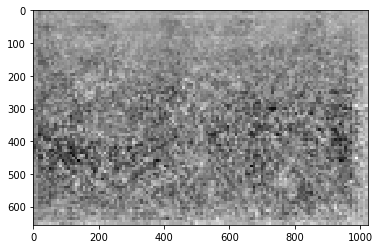

In [59]:
torch.backends.cudnn.enabled=False
img_root='./data/part_A_final/test_data/images'
gt_dmap_root='./data/part_A_final/test_data/ground_truth'
model_param_path='./checkpoints/shaghai_tech_a_best.pth'
cal_mae(img_root,gt_dmap_root,model_param_path)
estimate_density_map(img_root,gt_dmap_root,model_param_path,3)


  0%|          | 0/182 [00:00<?, ?it/s]

Before backend torch.Size([1, 512, 96, 128])



  1%|          | 1/182 [00:07<21:17,  7.06s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



  1%|          | 2/182 [00:13<20:23,  6.80s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 74, 112])



  2%|▏         | 3/182 [00:18<18:30,  6.20s/it]

After backend torch.Size([1, 64, 74, 112])
After output layer:  torch.Size([1, 1, 74, 112])
Final out torch.Size([1, 1, 592, 896])
Before backend torch.Size([1, 512, 82, 128])



  2%|▏         | 4/182 [00:24<18:33,  6.26s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 88, 128])



  3%|▎         | 5/182 [00:31<18:46,  6.36s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])
Before backend torch.Size([1, 512, 34, 56])
After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])



  3%|▎         | 6/182 [00:32<14:05,  4.81s/it]

Final out torch.Size([1, 1, 272, 448])
Before backend torch.Size([1, 512, 48, 74])



  4%|▍         | 7/182 [00:34<11:42,  4.02s/it]

After backend torch.Size([1, 64, 48, 74])
After output layer:  torch.Size([1, 1, 48, 74])
Final out torch.Size([1, 1, 384, 592])
Before backend torch.Size([1, 512, 84, 128])



  4%|▍         | 8/182 [00:40<13:02,  4.50s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



  5%|▍         | 9/182 [00:45<13:54,  4.83s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 128])



  5%|▌         | 10/182 [00:51<14:39,  5.11s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 52, 78])



  6%|▌         | 11/182 [00:53<12:22,  4.34s/it]

After backend torch.Size([1, 64, 52, 78])
After output layer:  torch.Size([1, 1, 52, 78])
Final out torch.Size([1, 1, 416, 624])
Before backend torch.Size([1, 512, 50, 112])



  7%|▋         | 12/182 [00:57<11:23,  4.02s/it]

After backend torch.Size([1, 64, 50, 112])
After output layer:  torch.Size([1, 1, 50, 112])
Final out torch.Size([1, 1, 400, 896])
Before backend torch.Size([1, 512, 96, 128])



  7%|▋         | 13/182 [01:04<13:45,  4.88s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



  8%|▊         | 14/182 [01:09<14:20,  5.12s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 52, 80])



  8%|▊         | 15/182 [01:12<12:20,  4.43s/it]

After backend torch.Size([1, 64, 52, 80])
After output layer:  torch.Size([1, 1, 52, 80])
Final out torch.Size([1, 1, 416, 640])
Before backend torch.Size([1, 512, 76, 50])



  9%|▉         | 16/182 [01:14<10:29,  3.79s/it]

After backend torch.Size([1, 64, 76, 50])
After output layer:  torch.Size([1, 1, 76, 50])
Final out torch.Size([1, 1, 608, 400])
Before backend torch.Size([1, 512, 96, 120])



  9%|▉         | 17/182 [01:22<13:21,  4.86s/it]

After backend torch.Size([1, 64, 96, 120])
After output layer:  torch.Size([1, 1, 96, 120])
Final out torch.Size([1, 1, 768, 960])
Before backend torch.Size([1, 512, 96, 128])



 10%|▉         | 18/182 [01:29<15:00,  5.49s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 10%|█         | 19/182 [01:35<15:56,  5.87s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 52, 66])



 11%|█         | 20/182 [01:38<12:52,  4.77s/it]

After backend torch.Size([1, 64, 52, 66])
After output layer:  torch.Size([1, 1, 52, 66])
Final out torch.Size([1, 1, 416, 528])
Before backend torch.Size([1, 512, 82, 128])



 12%|█▏        | 21/182 [01:43<13:37,  5.07s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 84, 128])



 12%|█▏        | 22/182 [01:49<14:11,  5.32s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 62, 128])



 13%|█▎        | 23/182 [01:54<13:35,  5.13s/it]

After backend torch.Size([1, 64, 62, 128])
After output layer:  torch.Size([1, 1, 62, 128])
Final out torch.Size([1, 1, 496, 1024])
Before backend torch.Size([1, 512, 84, 128])



 13%|█▎        | 24/182 [02:00<13:58,  5.30s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 14%|█▎        | 25/182 [02:06<14:15,  5.45s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])



 14%|█▍        | 26/182 [02:07<10:53,  4.19s/it]

Before backend torch.Size([1, 512, 54, 36])
After backend torch.Size([1, 64, 54, 36])
After output layer:  torch.Size([1, 1, 54, 36])
Final out torch.Size([1, 1, 432, 288])
Before backend torch.Size([1, 512, 84, 128])



 15%|█▍        | 27/182 [02:12<11:56,  4.62s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 15%|█▌        | 28/182 [02:19<12:59,  5.06s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 62, 124])



 16%|█▌        | 29/182 [02:24<13:13,  5.18s/it]

After backend torch.Size([1, 64, 62, 124])
After output layer:  torch.Size([1, 1, 62, 124])
Final out torch.Size([1, 1, 496, 992])
Before backend torch.Size([1, 512, 84, 128])



 16%|█▋        | 30/182 [02:31<14:10,  5.59s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 40, 62])



 17%|█▋        | 31/182 [02:32<11:02,  4.38s/it]

After backend torch.Size([1, 64, 40, 62])
After output layer:  torch.Size([1, 1, 40, 62])
Final out torch.Size([1, 1, 320, 496])
Before backend torch.Size([1, 512, 90, 120])



 18%|█▊        | 32/182 [02:39<12:49,  5.13s/it]

After backend torch.Size([1, 64, 90, 120])
After output layer:  torch.Size([1, 1, 90, 120])
Final out torch.Size([1, 1, 720, 960])
Before backend torch.Size([1, 512, 58, 124])



 18%|█▊        | 33/182 [02:44<12:29,  5.03s/it]

After backend torch.Size([1, 64, 58, 124])
After output layer:  torch.Size([1, 1, 58, 124])
Final out torch.Size([1, 1, 464, 992])
Before backend torch.Size([1, 512, 40, 62])



 19%|█▊        | 34/182 [02:45<09:45,  3.95s/it]

After backend torch.Size([1, 64, 40, 62])
After output layer:  torch.Size([1, 1, 40, 62])
Final out torch.Size([1, 1, 320, 496])
Before backend torch.Size([1, 512, 96, 128])



 19%|█▉        | 35/182 [02:55<13:42,  5.60s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 56, 86])



 20%|█▉        | 36/182 [02:58<12:03,  4.95s/it]

After backend torch.Size([1, 64, 56, 86])
After output layer:  torch.Size([1, 1, 56, 86])
Final out torch.Size([1, 1, 448, 688])
There is a grayscale image.
Before backend torch.Size([1, 512, 62, 128])



 20%|██        | 37/182 [03:04<12:39,  5.24s/it]

After backend torch.Size([1, 64, 62, 128])
After output layer:  torch.Size([1, 1, 62, 128])
Final out torch.Size([1, 1, 496, 1024])
Before backend torch.Size([1, 512, 84, 128])



 21%|██        | 38/182 [03:11<14:00,  5.84s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 86, 128])



 21%|██▏       | 39/182 [03:20<15:58,  6.71s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 46, 70])



 22%|██▏       | 40/182 [03:22<12:50,  5.43s/it]

After backend torch.Size([1, 64, 46, 70])
After output layer:  torch.Size([1, 1, 46, 70])
Final out torch.Size([1, 1, 368, 560])
Before backend torch.Size([1, 512, 84, 128])



 23%|██▎       | 41/182 [03:30<14:10,  6.03s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 74, 100])



 23%|██▎       | 42/182 [03:35<13:37,  5.84s/it]

After backend torch.Size([1, 64, 74, 100])
After output layer:  torch.Size([1, 1, 74, 100])
Final out torch.Size([1, 1, 592, 800])
Before backend torch.Size([1, 512, 54, 80])



 24%|██▎       | 43/182 [03:38<11:28,  4.95s/it]

After backend torch.Size([1, 64, 54, 80])
After output layer:  torch.Size([1, 1, 54, 80])
Final out torch.Size([1, 1, 432, 640])
Before backend torch.Size([1, 512, 96, 128])



 24%|██▍       | 44/182 [03:46<13:32,  5.89s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 44, 58])



 25%|██▍       | 45/182 [03:48<10:31,  4.61s/it]

After backend torch.Size([1, 64, 44, 58])
After output layer:  torch.Size([1, 1, 44, 58])
Final out torch.Size([1, 1, 352, 464])
Before backend torch.Size([1, 512, 66, 120])



 25%|██▌       | 46/182 [03:55<12:18,  5.43s/it]

After backend torch.Size([1, 64, 66, 120])
After output layer:  torch.Size([1, 1, 66, 120])
Final out torch.Size([1, 1, 528, 960])
Before backend torch.Size([1, 512, 58, 128])



 26%|██▌       | 47/182 [04:01<12:27,  5.54s/it]

After backend torch.Size([1, 64, 58, 128])
After output layer:  torch.Size([1, 1, 58, 128])
Final out torch.Size([1, 1, 464, 1024])
Before backend torch.Size([1, 512, 92, 128])



 26%|██▋       | 48/182 [04:10<14:27,  6.47s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 128, 92])



 27%|██▋       | 49/182 [04:18<15:43,  7.10s/it]

After backend torch.Size([1, 64, 128, 92])
After output layer:  torch.Size([1, 1, 128, 92])
Final out torch.Size([1, 1, 1024, 736])
Before backend torch.Size([1, 512, 60, 80])



 27%|██▋       | 50/182 [04:21<12:56,  5.88s/it]

After backend torch.Size([1, 64, 60, 80])
After output layer:  torch.Size([1, 1, 60, 80])
Final out torch.Size([1, 1, 480, 640])
Before backend torch.Size([1, 512, 60, 80])



 28%|██▊       | 51/182 [04:24<10:38,  4.87s/it]

After backend torch.Size([1, 64, 60, 80])
After output layer:  torch.Size([1, 1, 60, 80])
Final out torch.Size([1, 1, 480, 640])
Before backend torch.Size([1, 512, 54, 128])



 29%|██▊       | 52/182 [04:29<10:32,  4.87s/it]

After backend torch.Size([1, 64, 54, 128])
After output layer:  torch.Size([1, 1, 54, 128])
Final out torch.Size([1, 1, 432, 1024])
Before backend torch.Size([1, 512, 52, 74])



 29%|██▉       | 53/182 [04:31<09:08,  4.25s/it]

After backend torch.Size([1, 64, 52, 74])
After output layer:  torch.Size([1, 1, 52, 74])
Final out torch.Size([1, 1, 416, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 88, 128])



 30%|██▉       | 54/182 [04:39<11:27,  5.37s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])
Before backend torch.Size([1, 512, 62, 80])



 30%|███       | 55/182 [04:43<10:01,  4.74s/it]

After backend torch.Size([1, 64, 62, 80])
After output layer:  torch.Size([1, 1, 62, 80])
Final out torch.Size([1, 1, 496, 640])
Before backend torch.Size([1, 512, 84, 128])



 31%|███       | 56/182 [04:50<11:31,  5.49s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 50, 70])



 31%|███▏      | 57/182 [04:52<09:29,  4.56s/it]

After backend torch.Size([1, 64, 50, 70])
After output layer:  torch.Size([1, 1, 50, 70])
Final out torch.Size([1, 1, 400, 560])
Before backend torch.Size([1, 512, 56, 76])



 32%|███▏      | 58/182 [04:55<08:24,  4.06s/it]

After backend torch.Size([1, 64, 56, 76])
After output layer:  torch.Size([1, 1, 56, 76])
Final out torch.Size([1, 1, 448, 608])
Before backend torch.Size([1, 512, 42, 106])



 32%|███▏      | 59/182 [04:58<07:36,  3.71s/it]

After backend torch.Size([1, 64, 42, 106])
After output layer:  torch.Size([1, 1, 42, 106])
Final out torch.Size([1, 1, 336, 848])
There is a grayscale image.
Before backend torch.Size([1, 512, 94, 128])



 33%|███▎      | 60/182 [05:07<10:33,  5.19s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])
Before backend torch.Size([1, 512, 50, 84])



 34%|███▎      | 61/182 [05:09<08:55,  4.42s/it]

After backend torch.Size([1, 64, 50, 84])
After output layer:  torch.Size([1, 1, 50, 84])
Final out torch.Size([1, 1, 400, 672])
Before backend torch.Size([1, 512, 58, 78])



 34%|███▍      | 62/182 [05:12<08:00,  4.00s/it]

After backend torch.Size([1, 64, 58, 78])
After output layer:  torch.Size([1, 1, 58, 78])
Final out torch.Size([1, 1, 464, 624])
There is a grayscale image.
Before backend torch.Size([1, 512, 48, 74])



 35%|███▍      | 63/182 [05:15<06:59,  3.53s/it]

After backend torch.Size([1, 64, 48, 74])
After output layer:  torch.Size([1, 1, 48, 74])
Final out torch.Size([1, 1, 384, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 62, 80])



 35%|███▌      | 64/182 [05:18<06:29,  3.30s/it]

After backend torch.Size([1, 64, 62, 80])
After output layer:  torch.Size([1, 1, 62, 80])
Final out torch.Size([1, 1, 496, 640])
Before backend torch.Size([1, 512, 66, 120])



 36%|███▌      | 65/182 [05:23<07:38,  3.91s/it]

After backend torch.Size([1, 64, 66, 120])
After output layer:  torch.Size([1, 1, 66, 120])
Final out torch.Size([1, 1, 528, 960])
Before backend torch.Size([1, 512, 42, 128])



 36%|███▋      | 66/182 [05:27<07:39,  3.96s/it]

After backend torch.Size([1, 64, 42, 128])
After output layer:  torch.Size([1, 1, 42, 128])
Final out torch.Size([1, 1, 336, 1024])
Before backend torch.Size([1, 512, 88, 128])



 37%|███▋      | 67/182 [05:34<09:37,  5.02s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])
Before backend torch.Size([1, 512, 44, 58])



 37%|███▋      | 68/182 [05:36<07:38,  4.02s/it]

After backend torch.Size([1, 64, 44, 58])
After output layer:  torch.Size([1, 1, 44, 58])
Final out torch.Size([1, 1, 352, 464])
Before backend torch.Size([1, 512, 92, 128])



 38%|███▊      | 69/182 [05:43<09:25,  5.01s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 74, 112])



 38%|███▊      | 70/182 [05:50<09:58,  5.35s/it]

After backend torch.Size([1, 64, 74, 112])
After output layer:  torch.Size([1, 1, 74, 112])
Final out torch.Size([1, 1, 592, 896])
Before backend torch.Size([1, 512, 66, 128])



 39%|███▉      | 71/182 [05:55<10:02,  5.43s/it]

After backend torch.Size([1, 64, 66, 128])
After output layer:  torch.Size([1, 1, 66, 128])
Final out torch.Size([1, 1, 528, 1024])
Before backend torch.Size([1, 512, 66, 100])



 40%|███▉      | 72/182 [06:00<09:28,  5.17s/it]

After backend torch.Size([1, 64, 66, 100])
After output layer:  torch.Size([1, 1, 66, 100])
Final out torch.Size([1, 1, 528, 800])
Before backend torch.Size([1, 512, 56, 84])



 40%|████      | 73/182 [06:03<08:20,  4.59s/it]

After backend torch.Size([1, 64, 56, 84])
After output layer:  torch.Size([1, 1, 56, 84])
Final out torch.Size([1, 1, 448, 672])
Before backend torch.Size([1, 512, 60, 78])



 41%|████      | 74/182 [06:07<07:51,  4.37s/it]

After backend torch.Size([1, 64, 60, 78])
After output layer:  torch.Size([1, 1, 60, 78])
Final out torch.Size([1, 1, 480, 624])
Before backend torch.Size([1, 512, 84, 128])



 41%|████      | 75/182 [06:14<09:04,  5.09s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 42%|████▏     | 76/182 [06:21<09:57,  5.63s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 110])



 42%|████▏     | 77/182 [06:26<09:48,  5.61s/it]

After backend torch.Size([1, 64, 72, 110])
After output layer:  torch.Size([1, 1, 72, 110])
Final out torch.Size([1, 1, 576, 880])
Before backend torch.Size([1, 512, 52, 74])



 43%|████▎     | 78/182 [06:28<08:00,  4.62s/it]

After backend torch.Size([1, 64, 52, 74])
After output layer:  torch.Size([1, 1, 52, 74])
Final out torch.Size([1, 1, 416, 592])
Before backend torch.Size([1, 512, 32, 86])



 43%|████▎     | 79/182 [06:30<06:30,  3.79s/it]

After backend torch.Size([1, 64, 32, 86])
After output layer:  torch.Size([1, 1, 32, 86])
Final out torch.Size([1, 1, 256, 688])
Before backend torch.Size([1, 512, 84, 128])



 44%|████▍     | 80/182 [06:38<08:23,  4.94s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 80, 128])



 45%|████▍     | 81/182 [06:45<09:27,  5.62s/it]

After backend torch.Size([1, 64, 80, 128])
After output layer:  torch.Size([1, 1, 80, 128])
Final out torch.Size([1, 1, 640, 1024])
Before backend torch.Size([1, 512, 96, 128])



 45%|████▌     | 82/182 [06:54<10:59,  6.60s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 46%|████▌     | 83/182 [07:03<12:14,  7.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



 46%|████▌     | 84/182 [07:11<12:09,  7.44s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 128])



 47%|████▋     | 85/182 [07:18<11:42,  7.24s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 34, 68])



 47%|████▋     | 86/182 [07:19<08:51,  5.54s/it]

After backend torch.Size([1, 64, 34, 68])
After output layer:  torch.Size([1, 1, 34, 68])
Final out torch.Size([1, 1, 272, 544])
Before backend torch.Size([1, 512, 84, 128])



 48%|████▊     | 87/182 [07:26<09:26,  5.96s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 48%|████▊     | 88/182 [07:34<10:25,  6.66s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 128, 84])



 49%|████▉     | 89/182 [07:42<10:55,  7.05s/it]

After backend torch.Size([1, 64, 128, 84])
After output layer:  torch.Size([1, 1, 128, 84])
Final out torch.Size([1, 1, 1024, 672])
Before backend torch.Size([1, 512, 72, 128])



 49%|████▉     | 90/182 [07:50<10:53,  7.10s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 86, 128])



 50%|█████     | 91/182 [07:57<11:02,  7.28s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 96, 128])



 51%|█████     | 92/182 [08:06<11:27,  7.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 40, 128])



 51%|█████     | 93/182 [08:09<09:27,  6.38s/it]

After backend torch.Size([1, 64, 40, 128])
After output layer:  torch.Size([1, 1, 40, 128])
Final out torch.Size([1, 1, 320, 1024])
Before backend torch.Size([1, 512, 86, 128])



 52%|█████▏    | 94/182 [08:17<09:47,  6.67s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 42, 74])



 52%|█████▏    | 95/182 [08:19<07:41,  5.30s/it]

After backend torch.Size([1, 64, 42, 74])
After output layer:  torch.Size([1, 1, 42, 74])
Final out torch.Size([1, 1, 336, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 46, 68])



 53%|█████▎    | 96/182 [08:21<06:14,  4.36s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])
Before backend torch.Size([1, 512, 84, 128])



 53%|█████▎    | 97/182 [08:28<07:13,  5.10s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 56, 128])



 54%|█████▍    | 98/182 [08:33<07:15,  5.19s/it]

After backend torch.Size([1, 64, 56, 128])
After output layer:  torch.Size([1, 1, 56, 128])
Final out torch.Size([1, 1, 448, 1024])
Before backend torch.Size([1, 512, 92, 128])



 54%|█████▍    | 99/182 [08:41<08:22,  6.05s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 66, 104])



 55%|█████▍    | 100/182 [08:46<07:42,  5.64s/it]

After backend torch.Size([1, 64, 66, 104])
After output layer:  torch.Size([1, 1, 66, 104])
Final out torch.Size([1, 1, 528, 832])
There is a grayscale image.
Before backend torch.Size([1, 512, 82, 102])



 55%|█████▌    | 101/182 [08:52<07:55,  5.87s/it]

After backend torch.Size([1, 64, 82, 102])
After output layer:  torch.Size([1, 1, 82, 102])
Final out torch.Size([1, 1, 656, 816])
Before backend torch.Size([1, 512, 82, 124])



 56%|█████▌    | 102/182 [08:59<08:20,  6.25s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 58, 88])



 57%|█████▋    | 103/182 [09:03<07:07,  5.42s/it]

After backend torch.Size([1, 64, 58, 88])
After output layer:  torch.Size([1, 1, 58, 88])
Final out torch.Size([1, 1, 464, 704])
Before backend torch.Size([1, 512, 46, 68])



 57%|█████▋    | 104/182 [09:05<05:38,  4.34s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])
Before backend torch.Size([1, 512, 68, 128])



 58%|█████▊    | 105/182 [09:11<06:26,  5.02s/it]

After backend torch.Size([1, 64, 68, 128])
After output layer:  torch.Size([1, 1, 68, 128])
Final out torch.Size([1, 1, 544, 1024])
Before backend torch.Size([1, 512, 84, 128])



 58%|█████▊    | 106/182 [09:18<06:56,  5.48s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])



 59%|█████▉    | 107/182 [09:27<08:06,  6.49s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



 59%|█████▉    | 108/182 [09:33<08:03,  6.54s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 54, 68])



 60%|█████▉    | 109/182 [09:36<06:29,  5.34s/it]

After backend torch.Size([1, 64, 54, 68])
After output layer:  torch.Size([1, 1, 54, 68])
Final out torch.Size([1, 1, 432, 544])
Before backend torch.Size([1, 512, 84, 128])



 60%|██████    | 110/182 [09:43<07:06,  5.92s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 128, 124])



 61%|██████    | 111/182 [09:55<09:08,  7.73s/it]

After backend torch.Size([1, 64, 128, 124])
After output layer:  torch.Size([1, 1, 128, 124])
Final out torch.Size([1, 1, 1024, 992])
Before backend torch.Size([1, 512, 94, 128])



 62%|██████▏   | 112/182 [10:04<09:27,  8.10s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])
Before backend torch.Size([1, 512, 36, 56])



 62%|██████▏   | 113/182 [10:05<07:00,  6.09s/it]

After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])



 63%|██████▎   | 114/182 [10:12<07:00,  6.18s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])



 63%|██████▎   | 115/182 [10:20<07:35,  6.79s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 82, 124])



 64%|██████▎   | 116/182 [10:26<07:10,  6.52s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 74, 128])



 64%|██████▍   | 117/182 [10:33<07:09,  6.60s/it]

After backend torch.Size([1, 64, 74, 128])
After output layer:  torch.Size([1, 1, 74, 128])
Final out torch.Size([1, 1, 592, 1024])
Before backend torch.Size([1, 512, 96, 128])



 65%|██████▍   | 118/182 [10:41<07:40,  7.19s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 42, 90])



 65%|██████▌   | 119/182 [10:44<06:09,  5.86s/it]

After backend torch.Size([1, 64, 42, 90])
After output layer:  torch.Size([1, 1, 42, 90])
Final out torch.Size([1, 1, 336, 720])
Before backend torch.Size([1, 512, 54, 128])



 66%|██████▌   | 120/182 [10:49<05:43,  5.55s/it]

After backend torch.Size([1, 64, 54, 128])
After output layer:  torch.Size([1, 1, 54, 128])
Final out torch.Size([1, 1, 432, 1024])
Before backend torch.Size([1, 512, 50, 74])



 66%|██████▋   | 121/182 [10:51<04:44,  4.67s/it]

After backend torch.Size([1, 64, 50, 74])
After output layer:  torch.Size([1, 1, 50, 74])
Final out torch.Size([1, 1, 400, 592])
Before backend torch.Size([1, 512, 88, 128])



 67%|██████▋   | 122/182 [11:01<06:04,  6.07s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])
Before backend torch.Size([1, 512, 76, 94])



 68%|██████▊   | 123/182 [11:06<05:39,  5.75s/it]

After backend torch.Size([1, 64, 76, 94])
After output layer:  torch.Size([1, 1, 76, 94])
Final out torch.Size([1, 1, 608, 752])
Before backend torch.Size([1, 512, 78, 116])



 68%|██████▊   | 124/182 [11:12<05:44,  5.94s/it]

After backend torch.Size([1, 64, 78, 116])
After output layer:  torch.Size([1, 1, 78, 116])
Final out torch.Size([1, 1, 624, 928])
Before backend torch.Size([1, 512, 96, 128])



 69%|██████▊   | 125/182 [11:21<06:33,  6.91s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 38, 62])



 69%|██████▉   | 126/182 [11:23<05:01,  5.38s/it]

After backend torch.Size([1, 64, 38, 62])
After output layer:  torch.Size([1, 1, 38, 62])
Final out torch.Size([1, 1, 304, 496])
Before backend torch.Size([1, 512, 40, 66])



 70%|██████▉   | 127/182 [11:25<03:56,  4.31s/it]

After backend torch.Size([1, 64, 40, 66])
After output layer:  torch.Size([1, 1, 40, 66])
Final out torch.Size([1, 1, 320, 528])
Before backend torch.Size([1, 512, 46, 68])



 70%|███████   | 128/182 [11:27<03:12,  3.57s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])



 71%|███████   | 129/182 [11:28<02:33,  2.90s/it]

Before backend torch.Size([1, 512, 34, 56])
After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])
Final out torch.Size([1, 1, 272, 448])
Before backend torch.Size([1, 512, 86, 128])



 71%|███████▏  | 130/182 [11:36<03:45,  4.34s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 84, 128])



 72%|███████▏  | 131/182 [11:43<04:19,  5.10s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 73%|███████▎  | 132/182 [11:51<05:03,  6.08s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 52, 80])



 73%|███████▎  | 133/182 [11:55<04:19,  5.29s/it]

After backend torch.Size([1, 64, 52, 80])
After output layer:  torch.Size([1, 1, 52, 80])
Final out torch.Size([1, 1, 416, 640])
Before backend torch.Size([1, 512, 48, 90])



 74%|███████▎  | 134/182 [11:57<03:39,  4.58s/it]

After backend torch.Size([1, 64, 48, 90])
After output layer:  torch.Size([1, 1, 48, 90])
Final out torch.Size([1, 1, 384, 720])
Before backend torch.Size([1, 512, 84, 128])



 74%|███████▍  | 135/182 [12:04<04:02,  5.16s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 75%|███████▍  | 136/182 [12:11<04:24,  5.75s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 44, 128])



 75%|███████▌  | 137/182 [12:16<04:07,  5.49s/it]

After backend torch.Size([1, 64, 44, 128])
After output layer:  torch.Size([1, 1, 44, 128])
Final out torch.Size([1, 1, 352, 1024])
There is a grayscale image.
Before backend torch.Size([1, 512, 54, 78])



 76%|███████▌  | 138/182 [12:19<03:27,  4.71s/it]

After backend torch.Size([1, 64, 54, 78])
After output layer:  torch.Size([1, 1, 54, 78])
Final out torch.Size([1, 1, 432, 624])
Before backend torch.Size([1, 512, 96, 128])



 76%|███████▋  | 139/182 [12:27<04:09,  5.80s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 50, 76])



 77%|███████▋  | 140/182 [12:30<03:22,  4.82s/it]

After backend torch.Size([1, 64, 50, 76])
After output layer:  torch.Size([1, 1, 50, 76])
Final out torch.Size([1, 1, 400, 608])
Before backend torch.Size([1, 512, 42, 92])



 77%|███████▋  | 141/182 [12:33<02:57,  4.34s/it]

After backend torch.Size([1, 64, 42, 92])
After output layer:  torch.Size([1, 1, 42, 92])
Final out torch.Size([1, 1, 336, 736])



 78%|███████▊  | 142/182 [12:34<02:16,  3.40s/it]

Before backend torch.Size([1, 512, 28, 42])
After backend torch.Size([1, 64, 28, 42])
After output layer:  torch.Size([1, 1, 28, 42])
Final out torch.Size([1, 1, 224, 336])
Before backend torch.Size([1, 512, 76, 128])



 79%|███████▊  | 143/182 [12:42<03:02,  4.68s/it]

After backend torch.Size([1, 64, 76, 128])
After output layer:  torch.Size([1, 1, 76, 128])
Final out torch.Size([1, 1, 608, 1024])
Before backend torch.Size([1, 512, 84, 128])



 79%|███████▉  | 144/182 [12:49<03:26,  5.44s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 80%|███████▉  | 145/182 [12:57<03:46,  6.12s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])



 80%|████████  | 146/182 [12:58<02:46,  4.64s/it]

Before backend torch.Size([1, 512, 28, 50])
After backend torch.Size([1, 64, 28, 50])
After output layer:  torch.Size([1, 1, 28, 50])
Final out torch.Size([1, 1, 224, 400])
Before backend torch.Size([1, 512, 94, 128])



 81%|████████  | 147/182 [13:06<03:22,  5.79s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])
Before backend torch.Size([1, 512, 84, 128])



 81%|████████▏ | 148/182 [13:14<03:31,  6.22s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])



 82%|████████▏ | 149/182 [13:24<04:02,  7.35s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])



 82%|████████▏ | 150/182 [13:25<02:56,  5.51s/it]

Before backend torch.Size([1, 512, 34, 56])
After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])
Final out torch.Size([1, 1, 272, 448])



 83%|████████▎ | 151/182 [13:26<02:11,  4.24s/it]

Before backend torch.Size([1, 512, 36, 56])
After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])



 84%|████████▎ | 152/182 [13:32<02:24,  4.81s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 78, 128])



 84%|████████▍ | 153/182 [13:40<02:42,  5.62s/it]

After backend torch.Size([1, 64, 78, 128])
After output layer:  torch.Size([1, 1, 78, 128])
Final out torch.Size([1, 1, 624, 1024])
Before backend torch.Size([1, 512, 62, 94])



 85%|████████▍ | 154/182 [13:44<02:25,  5.20s/it]

After backend torch.Size([1, 64, 62, 94])
After output layer:  torch.Size([1, 1, 62, 94])
Final out torch.Size([1, 1, 496, 752])



 85%|████████▌ | 155/182 [13:45<01:47,  3.98s/it]

Before backend torch.Size([1, 512, 36, 56])
After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])



 86%|████████▌ | 156/182 [13:51<02:01,  4.66s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 86%|████████▋ | 157/182 [13:58<02:13,  5.36s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 87%|████████▋ | 158/182 [14:05<02:19,  5.80s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])



 87%|████████▋ | 159/182 [14:06<01:39,  4.30s/it]

Before backend torch.Size([1, 512, 28, 50])
After backend torch.Size([1, 64, 28, 50])
After output layer:  torch.Size([1, 1, 28, 50])
Final out torch.Size([1, 1, 224, 400])
There is a grayscale image.
Before backend torch.Size([1, 512, 98, 128])



 88%|████████▊ | 160/182 [14:15<02:04,  5.64s/it]

After backend torch.Size([1, 64, 98, 128])
After output layer:  torch.Size([1, 1, 98, 128])
Final out torch.Size([1, 1, 784, 1024])
Before backend torch.Size([1, 512, 76, 58])



 88%|████████▊ | 161/182 [14:18<01:43,  4.93s/it]

After backend torch.Size([1, 64, 76, 58])
After output layer:  torch.Size([1, 1, 76, 58])
Final out torch.Size([1, 1, 608, 464])
Before backend torch.Size([1, 512, 68, 128])



 89%|████████▉ | 162/182 [14:26<01:54,  5.73s/it]

After backend torch.Size([1, 64, 68, 128])
After output layer:  torch.Size([1, 1, 68, 128])
Final out torch.Size([1, 1, 544, 1024])
Before backend torch.Size([1, 512, 72, 128])



 90%|████████▉ | 163/182 [14:32<01:52,  5.95s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 96, 128])



 90%|█████████ | 164/182 [14:41<02:01,  6.75s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 116, 128])



 91%|█████████ | 165/182 [14:53<02:21,  8.32s/it]

After backend torch.Size([1, 64, 116, 128])
After output layer:  torch.Size([1, 1, 116, 128])
Final out torch.Size([1, 1, 928, 1024])
Before backend torch.Size([1, 512, 82, 124])



 91%|█████████ | 166/182 [15:01<02:12,  8.30s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 56, 80])



 92%|█████████▏| 167/182 [15:04<01:42,  6.80s/it]

After backend torch.Size([1, 64, 56, 80])
After output layer:  torch.Size([1, 1, 56, 80])
Final out torch.Size([1, 1, 448, 640])
Before backend torch.Size([1, 512, 68, 98])



 92%|█████████▏| 168/182 [15:09<01:26,  6.20s/it]

After backend torch.Size([1, 64, 68, 98])
After output layer:  torch.Size([1, 1, 68, 98])
Final out torch.Size([1, 1, 544, 784])
Before backend torch.Size([1, 512, 84, 128])



 93%|█████████▎| 169/182 [15:17<01:26,  6.69s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 93%|█████████▎| 170/182 [15:24<01:23,  6.93s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 90, 128])



 94%|█████████▍| 171/182 [15:33<01:21,  7.44s/it]

After backend torch.Size([1, 64, 90, 128])
After output layer:  torch.Size([1, 1, 90, 128])
Final out torch.Size([1, 1, 720, 1024])
Before backend torch.Size([1, 512, 82, 128])



 95%|█████████▍| 172/182 [15:41<01:15,  7.52s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 52, 128])



 95%|█████████▌| 173/182 [15:45<01:00,  6.68s/it]

After backend torch.Size([1, 64, 52, 128])
After output layer:  torch.Size([1, 1, 52, 128])
Final out torch.Size([1, 1, 416, 1024])
Before backend torch.Size([1, 512, 66, 90])



 96%|█████████▌| 174/182 [15:50<00:47,  5.92s/it]

After backend torch.Size([1, 64, 66, 90])
After output layer:  torch.Size([1, 1, 66, 90])
Final out torch.Size([1, 1, 528, 720])



 96%|█████████▌| 175/182 [15:50<00:30,  4.34s/it]

Before backend torch.Size([1, 512, 24, 36])
After backend torch.Size([1, 64, 24, 36])
After output layer:  torch.Size([1, 1, 24, 36])
Final out torch.Size([1, 1, 192, 288])
Before backend torch.Size([1, 512, 84, 128])



 97%|█████████▋| 176/182 [15:58<00:31,  5.24s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 46, 100])



 97%|█████████▋| 177/182 [16:01<00:23,  4.67s/it]

After backend torch.Size([1, 64, 46, 100])
After output layer:  torch.Size([1, 1, 46, 100])
Final out torch.Size([1, 1, 368, 800])
Before backend torch.Size([1, 512, 96, 128])



 98%|█████████▊| 178/182 [16:09<00:23,  5.84s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



 98%|█████████▊| 179/182 [16:17<00:19,  6.40s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 50, 128])



 99%|█████████▉| 180/182 [16:22<00:11,  5.82s/it]

After backend torch.Size([1, 64, 50, 128])
After output layer:  torch.Size([1, 1, 50, 128])
Final out torch.Size([1, 1, 400, 1024])
Before backend torch.Size([1, 512, 84, 128])



 99%|█████████▉| 181/182 [16:28<00:06,  6.12s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 66, 104])



100%|██████████| 182/182 [16:33<00:00,  5.46s/it]

After backend torch.Size([1, 64, 66, 104])
After output layer:  torch.Size([1, 1, 66, 104])
Final out torch.Size([1, 1, 528, 832])
model_param_path:./checkpoints/Shanghai_Tech_B_1_best.pth mae:531.6588908604214


Before backend torch.Size([1, 512, 82, 128])
After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
(656, 1024)


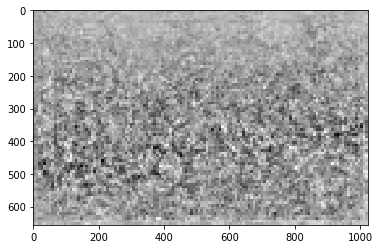

In [64]:
torch.backends.cudnn.enabled=False
img_root='./data/part_B_final/test_data/images'
gt_dmap_root='./data/part_B_final/test_data/ground_truth'
model_param_path='./checkpoints/Shanghai_Tech_B_1_best.pth'
cal_mae(img_root,gt_dmap_root,model_param_path)
estimate_density_map(img_root,gt_dmap_root,model_param_path,3)